In [3]:
import pandas as pd
from scipy.stats import zscore

In [10]:
df = pd.read_csv('2022_forbes_billionaires.csv')

In [12]:
df

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [14]:
#CLean networth column
df['networth'] = df['networth'].str.replace('$', '', regex=False) # Remove $
df['networth'] = df['networth'].str.replace('B', '', regex=False) # Remove B
df['networth'] = pd.to_numeric(df['networth'], errors = 'coerce') #Convert to numeric    coerce will replace wrong data with null value
df



,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


In [18]:

#Drop rows with missing or invalid networth values 
df = df.dropna(subset=['networth'])
df

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


In [27]:
#Calculate z-scores for networth
df['networth_zscore'] = zscore(df['networth'])

In [29]:
df

,Unnamed: 0,rank,name,networth,age,country,source,industry,networth_zscore
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,20.092595
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,15.588775
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail,14.368991
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,11.647933
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,10.615808
...,...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare,-0.362253
2596,2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail,-0.362253
2597,2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail,-0.362253
2598,2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail,-0.362253


In [31]:
#Calculate percentile for networth
df['networth_percentile'] = df['networth'].rank(pct=True)*100

In [33]:
df


,Unnamed: 0,rank,name,networth,age,country,source,industry,networth_zscore,networth_percentile
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,20.092595,100.000000
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,15.588775,99.961538
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail,14.368991,99.923077
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,11.647933,99.884615
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,10.615808,99.846154
...,...,...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare,-0.362253,0.461538
2596,2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail,-0.362253,0.461538
2597,2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail,-0.362253,0.461538
2598,2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail,-0.362253,0.461538


In [35]:
#Display mean and SD
networth_mean = df['networth'].mean()
networth_std = df['networth'].std()
print(f"Mean of ")

In [51]:
#Display the fiorst few rows of the updated dataframe
print("Firs few rows")
print(df.head(10))
print(df.tail())

Firs few rows
   Unnamed: 0  rank                       name  networth  age        country  \
0           0     1                 Elon Musk      219.0   50  United States   
1           1     2                Jeff Bezos      171.0   58  United States   
2           2     3  Bernard Arnault & family      158.0   73         France   
3           3     4                Bill Gates      129.0   66  United States   
4           4     5            Warren Buffett      118.0   91  United States   
5           5     6                Larry Page      111.0   49  United States   
6           6     7               Sergey Brin      107.0   48  United States   
7           7     8             Larry Ellison      106.0   77  United States   
8           8     9             Steve Ballmer       91.4   66  United States   
9           9    10             Mukesh Ambani       90.7   64          India   

               source                industry  networth_zscore  \
0       Tesla, SpaceX             Autom

In [37]:
#SAve the modified dataframe to csv file
df.to_csv('Billionaire-with-networth-z-scores-and-percentiles.csv', index=False)

Text(0, 0.5, '')

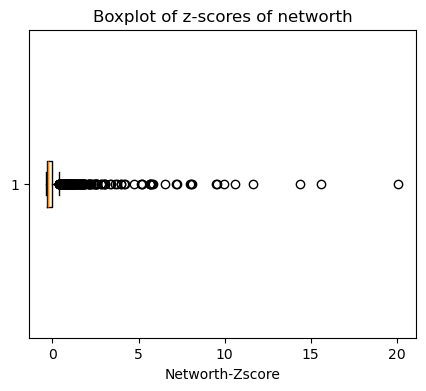

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.boxplot(df['networth_zscore'], vert=False)
plt.title('Boxplot of z-scores of networth')
plt.xlabel('Networth-Zscore')
plt.ylabel('')


# Assignment 

use the ipl dataset  
dowmolad all teams datasets
find z-scores and percentile for combined data using 'winning bid' column.
Show top 10 pl;ayers names and their winning Bids, Z scores and percentiles.
Draw a box plot of 'winning bid z scores' column

In [72]:
CSK_Players_List = pd.read_csv('C:/Users/dbda.STUDENTSDC/Advances Analytics/Day7/IPL_Dataset/CSK_Players_List.csv')
DC_Players_List = pd.read_csv('C:/Users/dbda.STUDENTSDC/Advances Analytics/Day7/IPL_Dataset/DC_Players_List.csv')
GT_Players_List = pd.read_csv('C:/Users/dbda.STUDENTSDC/Advances Analytics/Day7/IPL_Dataset/GT_Players_List.csv')
KKR_Players_List = pd.read_csv('C:/Users/dbda.STUDENTSDC/Advances Analytics/Day7/IPL_Dataset/KKR_Players_List.csv')
MI_Players_List = pd.read_csv('C:/Users/dbda.STUDENTSDC/Advances Analytics/Day7/IPL_Dataset/MI_Players_List.csv')
LSG_Players_List = pd.read_csv('C:/Users/dbda.STUDENTSDC/Advances Analytics/Day7/IPL_Dataset/LSG_Players_List.csv')
PBKS_Players_List = pd.read_csv('C:/Users/dbda.STUDENTSDC/Advances Analytics/Day7/IPL_Dataset/PBKS_Players_List.csv')
RR_Players_List = pd.read_csv('C:/Users/dbda.STUDENTSDC/Advances Analytics/Day7/IPL_Dataset/RR_Players_List.csv')
SRH_Players_List = pd.read_csv('C:/Users/dbda.STUDENTSDC/Advances Analytics/Day7/IPL_Dataset/SRH_Players_List.csv')
RCB_Players_List = pd.read_csv('C:/Users/dbda.STUDENTSDC/Advances Analytics/Day7/IPL_Dataset/RCB_Players_List.csv')


In [78]:
df =  pd.concat([CSK_Players_List,DC_Players_List,GT_Players_List,KKR_Players_List,MI_Players_List,LSG_Players_List,PBKS_Players_List,RR_Players_List,SRH_Players_List,RCB_Players_List])

In [80]:
df

,Sr. No.,Player,Base Price,Winning Bid,Capped/Uncapped
0,1,Noor Ahmad,20000000,100000000,Capped
1,2,Ravichandaran Ashwin,20000000,97500000,Capped
2,3,Devon Conway,20000000,62500000,Capped
3,4,Syed Khaleel Ahmed,20000000,48000000,Capped
4,5,Rachin Ravindra,15000000,40000000,Capped
...,...,...,...,...,...
14,15,Swapnil Singh,30000000,50000000,Uncapped
15,16,Mohit Rathee,30000000,30000000,Uncapped
16,17,Abhinandan Singh,30000000,30000000,Uncapped
17,18,Swastik Chhikara,30000000,30000000,Uncapped


In [93]:
df['z_score'] = zscore(df['Winning Bid']) 
df

,Sr. No.,Player,Base Price,Winning Bid,Capped/Uncapped,z_score
0,1,Noor Ahmad,20000000,100000000,Capped,-0.073562
1,2,Ravichandaran Ashwin,20000000,97500000,Capped,-0.083738
2,3,Devon Conway,20000000,62500000,Capped,-0.226209
3,4,Syed Khaleel Ahmed,20000000,48000000,Capped,-0.285233
4,5,Rachin Ravindra,15000000,40000000,Capped,-0.317797
...,...,...,...,...,...,...
14,15,Swapnil Singh,30000000,50000000,Uncapped,-0.277091
15,16,Mohit Rathee,30000000,30000000,Uncapped,-0.358503
16,17,Abhinandan Singh,30000000,30000000,Uncapped,-0.358503
17,18,Swastik Chhikara,30000000,30000000,Uncapped,-0.358503


In [95]:
df['winningBid_percentile'] = df['Winning Bid'].rank(pct=True)*100

In [97]:
df

,Sr. No.,Player,Base Price,Winning Bid,Capped/Uncapped,z_score,winningBid_percentile
0,1,Noor Ahmad,20000000,100000000,Capped,-0.073562,75.549451
1,2,Ravichandaran Ashwin,20000000,97500000,Capped,-0.083738,73.901099
2,3,Devon Conway,20000000,62500000,Capped,-0.226209,67.307692
3,4,Syed Khaleel Ahmed,20000000,48000000,Capped,-0.285233,64.560440
4,5,Rachin Ravindra,15000000,40000000,Capped,-0.317797,61.813187
...,...,...,...,...,...,...,...
14,15,Swapnil Singh,30000000,50000000,Uncapped,-0.277091,65.384615
15,16,Mohit Rathee,30000000,30000000,Uncapped,-0.358503,53.846154
16,17,Abhinandan Singh,30000000,30000000,Uncapped,-0.358503,53.846154
17,18,Swastik Chhikara,30000000,30000000,Uncapped,-0.358503,53.846154


In [99]:
#Display mean and SD
winningBid_mean = df['Winning Bid'].mean()
winningBid_std = df['Winning Bid'].std()
print(f"Mean of {winningBid_mean}")
print(f"std of {winningBid_std}")

Mean of 118071428.57142857
std of 246341844.31808636


Text(0, 0.5, '')

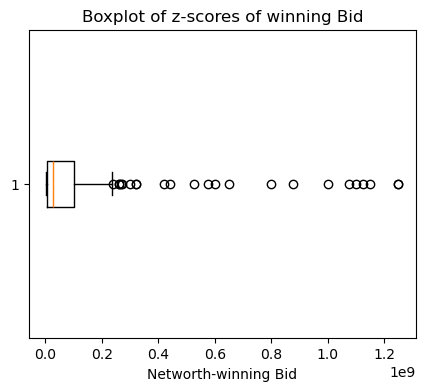

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.boxplot(df['Winning Bid'], vert=False)
plt.title('Boxplot of z-scores of winning Bid')
plt.xlabel('Networth-winning Bid')
plt.ylabel('')


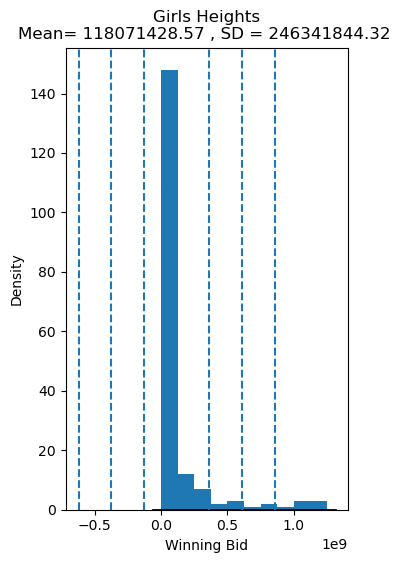

In [117]:
import seaborn as sns
import numpy as np
from scipy.stats import norm

plt.figure(figsize=(8,6))


plt.subplot(1,2,2)
sns.histplot(df['Winning Bid'], kde = True, stat= 'density', linewidth=0)
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, winningBid_mean, winningBid_std)
plt.plot(x,p,'k', linewidth=2)
title = "Girls Heights\nMean= {:.2f} , SD = {:.2f} ".format(winningBid_mean, winningBid_std)
plt.title(title)
plt.hist(df['Winning Bid'])
#PLot standard deviation lines for boys

for i in range(1,4):
    plt.axvline(winningBid_mean + i *winningBid_std, linestyle='--')
    plt.axvline(winningBid_mean - i *winningBid_std, linestyle='--')